In [148]:
import pandas as pd 
import numpy as np 
import plotly.express as px 
import matplotlib.pyplot as plt 
import plotly.graph_objects as go


### PART1:ANALYSIS AND VISUALIZATION

In [149]:
df=pd.read_csv(r"C:\Users\user\Downloads\Safe water (2)\Safe water\Final_cleaned_income_countries.csv")
df

,iso3,county,year,residence,improved_wat_%,improved_san_%,under_5_mortality_rates,income_group,region,total_population,gdp_per_capita_$,population_rural_%,population_urban_%
0,AFG,Afghanistan,2000,Urban,68.9,65.3,137.6,Low income,South Asia,20779953.0,0.000000,75.492,24.508
1,AFG,Afghanistan,2000,Rural,19.6,21.0,137.6,Low income,South Asia,20779953.0,0.000000,75.492,24.508
2,AFG,Afghanistan,2001,Urban,70.4,66.9,133.6,Low income,South Asia,21606988.0,0.000000,75.251,24.749
3,AFG,Afghanistan,2001,Rural,21.6,22.7,133.6,Low income,South Asia,21606988.0,0.000000,75.251,24.749
4,AFG,Afghanistan,2002,Urban,71.8,68.5,129.4,Low income,South Asia,22600770.0,1189.784668,75.007,24.993
...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,ZWE,Zimbabwe,2020,Rural,61.9,36.5,57.1,Low income,Sub-Saharan Africa,14862924.0,2435.539795,60.680,39.320
732,ZWE,Zimbabwe,2021,Urban,96.5,52.5,55.8,Low income,Sub-Saharan Africa,15092171.0,2611.378906,60.352,39.648
733,ZWE,Zimbabwe,2021,Rural,61.0,36.6,55.8,Low income,Sub-Saharan Africa,15092171.0,2611.378906,60.352,39.648
734,ZWE,Zimbabwe,2022,Urban,97.8,52.7,0.0,Low income,Sub-Saharan Africa,15333516.0,2679.539795,60.023,39.977


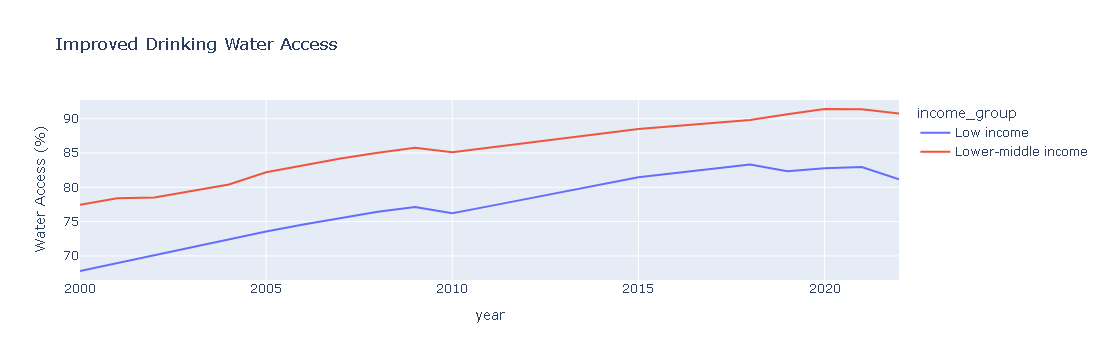

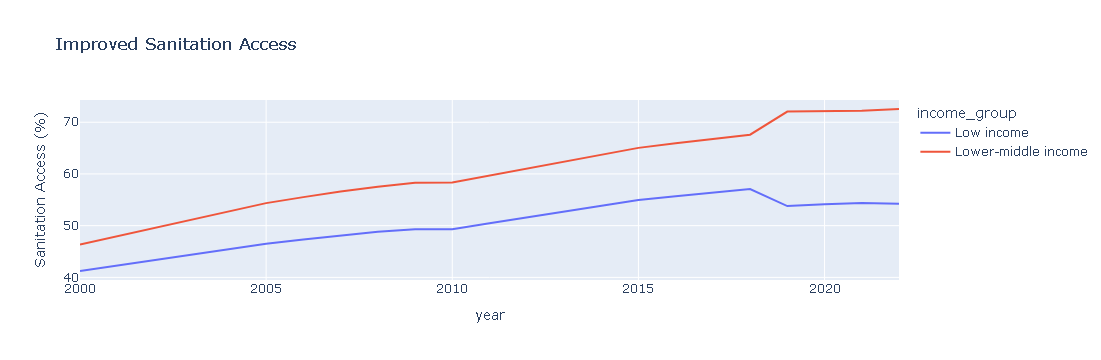

In [332]:
import plotly.express as px

developing_df = df[df['income_group'].isin(['Low income', 'Lower-middle income'])]



avg_trend = developing_df.groupby(['year', 'income_group'])[['improved_wat_%', 'improved_san_%']].mean().reset_index()


fig1 = px.line(avg_trend, x='year', y='improved_wat_%', color='income_group',
               title=' Improved Drinking Water Access',
               labels={'improved_wat_%': 'Water Access (%)'})
fig1.show()
fig.write_image("improved_wt_access.png")



fig2 = px.line(avg_trend, x='year', y='improved_san_%', color='income_group',
               title='Improved Sanitation Access ',
               labels={'improved_san_%': 'Sanitation Access (%)'})
fig2.show()
fig.write_image("improved_san_access.png")



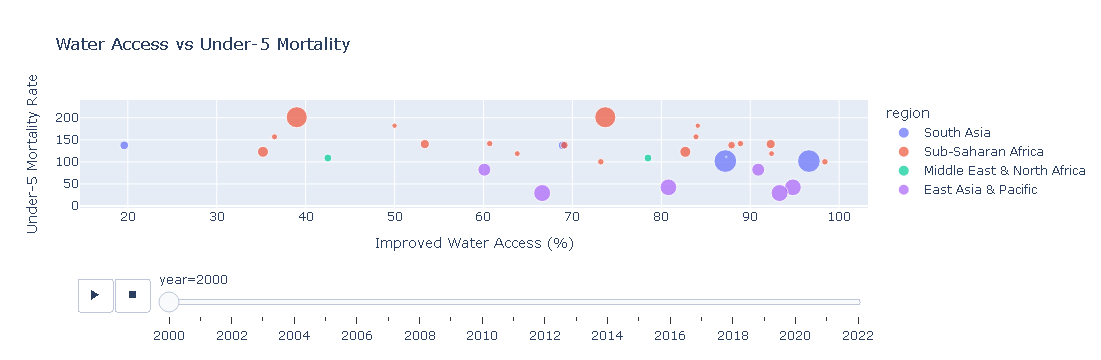

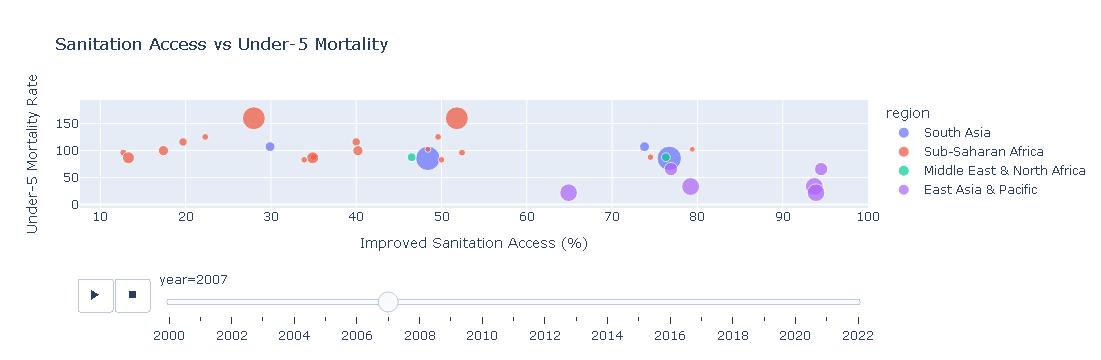

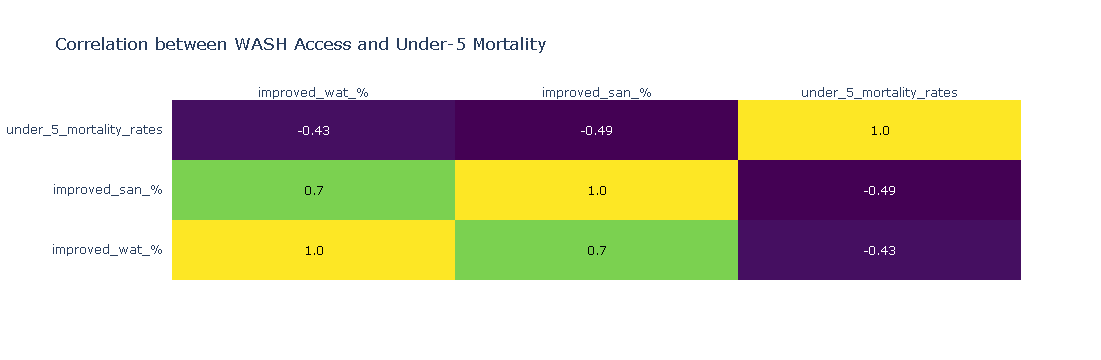

In [291]:
fig3 = px.scatter(df, x='improved_wat_%', y='under_5_mortality_rates',
                  color='region', size='total_population', hover_name='county',
                  animation_frame='year',
                  title='Water Access vs Under-5 Mortality',
                  labels={'improved_wat_%': 'Improved Water Access (%)',
                          'under_5_mortality_rates': 'Under-5 Mortality Rate'})
fig3.show()
fig.write_image("improved_water_access.png")


fig4 = px.scatter(df, x='improved_san_%', y='under_5_mortality_rates',
                  color='region', size='total_population', hover_name='county',
                  animation_frame='year',
                  title='Sanitation Access vs Under-5 Mortality ',
                  labels={'improved_san_%': 'Improved Sanitation Access (%)',
                          'under_5_mortality_rates': 'Under-5 Mortality Rate'})
fig4.show()
fig.write_image("sanitation_access.png")

import plotly.figure_factory as ff

# Correlation matrix
correlation = df[['improved_wat_%', 'improved_san_%', 'under_5_mortality_rates']].corr()
z = correlation.values.round(2)
x = list(correlation.columns)
y = x

fig = ff.create_annotated_heatmap(z, x=x, y=y, colorscale='Viridis')
fig.update_layout(title='Correlation between WASH Access and Under-5 Mortality',
                  template='plotly_white')
fig.show()
fig.write_image("correlation_between_wash access.png")



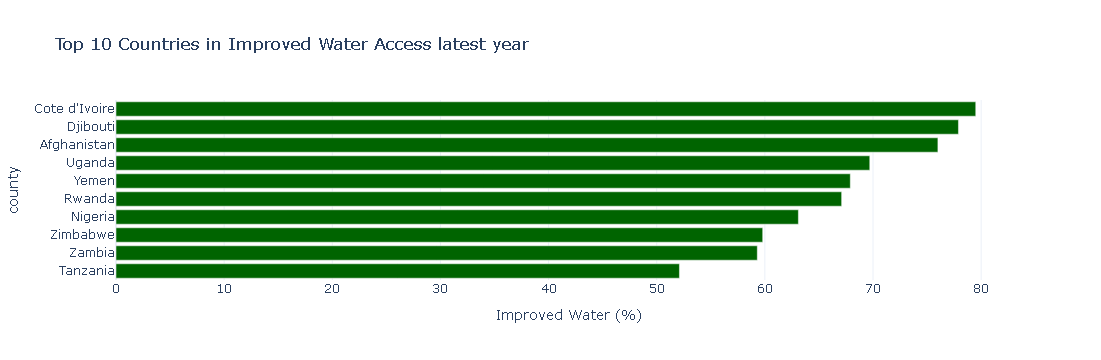

In [289]:
import plotly.express as px

latest_year = df['year'].max()
bottom_water = df[df['year'] == latest_year].sort_values(by='improved_wat_%').head(10)

fig = px.bar(
    bottom_water,
    x='improved_wat_%',
    y='county',
    title='Top 10 Countries in Improved Water Access latest year',
    labels={'improved_wat_%': 'Improved Water (%)'},
    orientation='h',
    template='plotly_white',
    color_discrete_sequence=['darkgreen']
)

fig.update_yaxes(categoryorder='total ascending')
fig.show()
fig.write_image("top_10_countries_improved_water.png")


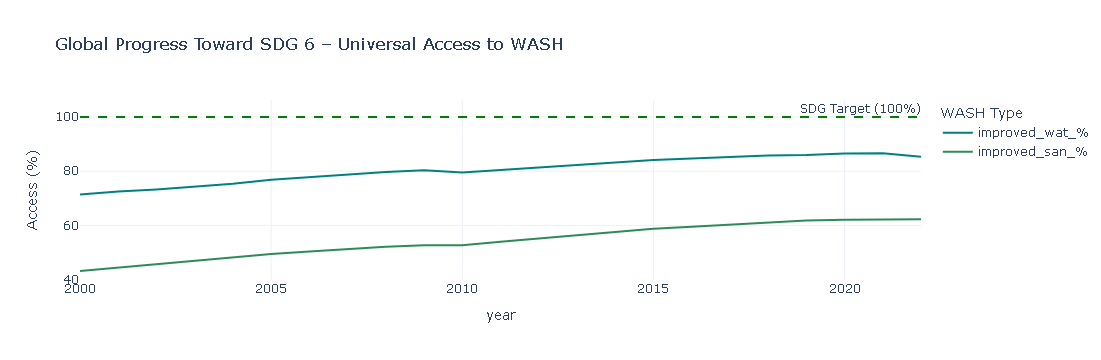

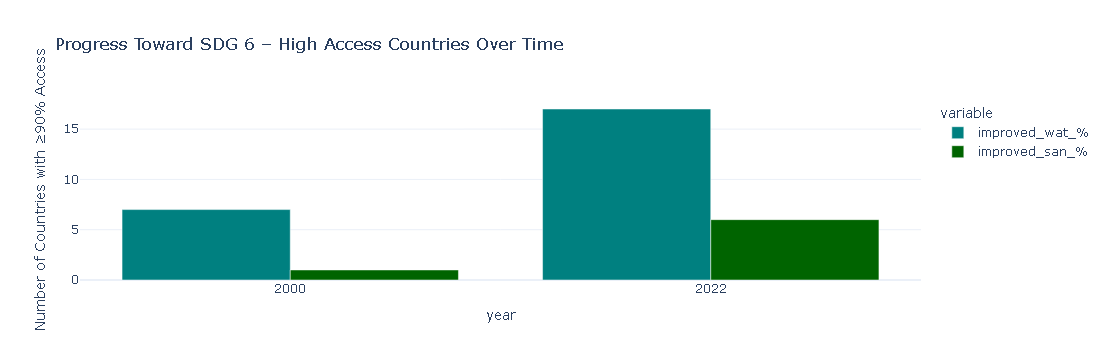

In [295]:
fig6 = px.line(
    sdg_progress,
    x='year',
    y=['improved_wat_%', 'improved_san_%'],
    title='Global Progress Toward SDG 6 – Universal Access to WASH',
    labels={'value': 'Access (%)', 'variable': 'WASH Type'},
    color_discrete_map={
        'improved_wat_%': 'Teal',    
        'improved_san_%': 'seagreen'  
    }
)

fig6.add_hline(y=100, line_dash="dash", line_color="green", annotation_text="SDG Target (100%)")
fig6.update_layout(template="plotly_white")
fig6.show()
fig.write_image("SDG6_line.png")


fig = px.bar(
    summary,
    x='year',
    y=['improved_wat_%', 'improved_san_%'],
    barmode='group',
    labels={'value': 'Number of Countries with ≥90% Access'},
    title='Progress Toward SDG 6 – High Access Countries Over Time',
    template='plotly_white',
    color_discrete_map={
        'improved_wat_%': 'teal',    
        'improved_san_%': 'darkgreen'  
    }
)
fig.show()
fig.write_image("SDG 6_bar.png")




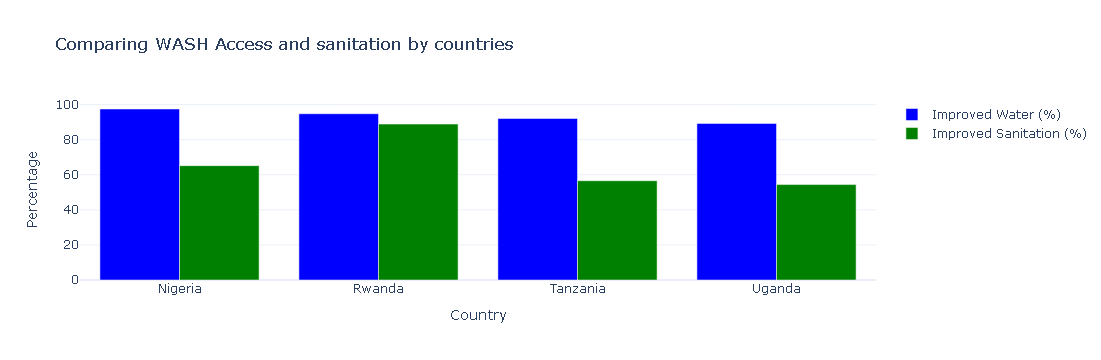

In [297]:
import plotly.graph_objects as go
latest_year = df_unique.groupby('county')['year'].max().reset_index()
latest_data = pd.merge(df_unique, latest_year, on=['county', 'year'], how='inner')

selected_countries = ['Rwanda', 'Ethiopia', 'Kenya', 'Uganda', 'Burundi',
                      'Tanzania', 'Nigeria', 'Ghana', 'Mozambique', 'DR Congo']
latest_selected = latest_data[latest_data['county'].isin(selected_countries)]
fig = go.Figure(data=[
    go.Bar(name='Improved Water (%)',
           x=latest_selected['county'],
           y=latest_selected['improved_wat_%'],
           marker_color='blue'),

    go.Bar(name='Improved Sanitation (%)',
           x=latest_selected['county'],
           y=latest_selected['improved_san_%'],
           marker_color='green'),


])


fig.update_layout(
    barmode='group',
    title='Comparing WASH Access and sanitation by countries',
    xaxis_title='Country',
    yaxis_title='Percentage ',
    template='plotly_white',
    height=400
)

fig.show()
fig.write_image("comparing wash_access_and_sanitation.png")



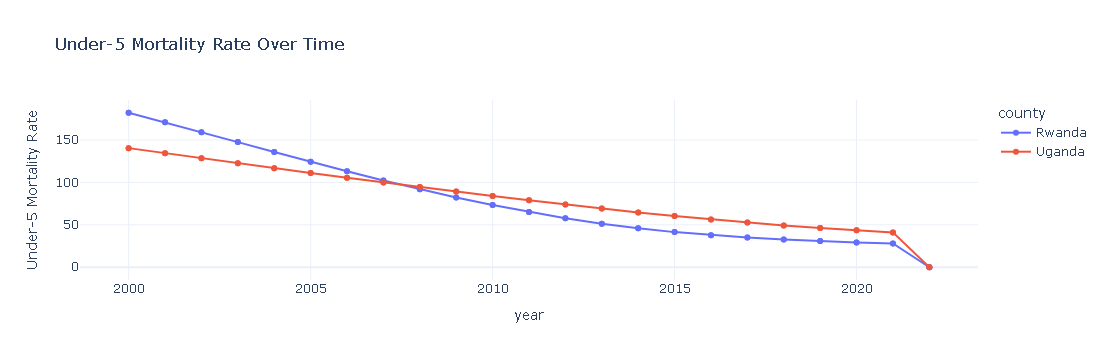

In [313]:
selected_countries = ['Rwanda', 'Uganda']

fig = px.line(
    df[df['county'].isin(selected_countries)],
    x='year',
    y='under_5_mortality_rates',
    color='county',
    markers=True,
    title='Under-5 Mortality Rate Over Time',
    labels={'under_5_mortality_rates': 'Under-5 Mortality Rate'},
    template='plotly_white'
)
fig.show()


### PART2: STATISTICAL TEST

### 1. Statistical Test between trends line improved water access and sanitation

In [340]:
from scipy.stats import ttest_ind, shapiro, normaltest
import pandas as pd

# Filter for relevant income groups (corrected label)
developing_df = df[df['income_group'].isin(['Low income', 'Lower-middle income'])]

# Select the groups
water_low = developing_df[developing_df['income_group'] == 'Low income']['improved_wat_%'].dropna()
water_middle = developing_df[developing_df['income_group'] == 'Lower-middle income']['improved_wat_%'].dropna()

san_low = developing_df[developing_df['income_group'] == 'Low income']['improved_san_%'].dropna()
san_middle = developing_df[developing_df['income_group'] == 'Lower-middle income']['improved_san_%'].dropna()

# Normality tests (Shapiro-Wilk is good for <5000 samples)
def check_normality(data, label):
    stat, p = shapiro(data)
    if p > 0.05:
        print(f" {label} appears to be normally distributed (p = {p:.3f})")
    else:
        print(f" {label} does NOT appear to be normally distributed (p = {p:.3f})")

print("\n Normality Check (Shapiro-Wilk Test):")
check_normality(water_low, "Improved Water - Low Income")
check_normality(water_middle, "Improved Water - Lower-Middle Income")
check_normality(san_low, "Improved Sanitation - Low Income")
check_normality(san_middle, "Improved Sanitation - Lower-Middle Income")

#  T-Tests (valid if both groups are normally distributed & similar variances)
t_stat_water, p_value_water = ttest_ind(water_low, water_middle, equal_var=False)
t_stat_san, p_value_san = ttest_ind(san_low, san_middle, equal_var=False)

# Print results
print("\n T-test Results:")
print(f"Water Access - t-statistic = {t_stat_water:.3f}, p-value = {p_value_water:.3f}")
print(f"Sanitation Access - t-statistic = {t_stat_san:.3f}, p-value = {p_value_san:.3f}")

if p_value_water < 0.05:
    print("Statistically significant difference in improved water access.")
else:
    print(" No statistically significant difference in improved water access.")

if p_value_san < 0.05:
    print(" Statistically significant difference in improved sanitation access.")
else:
    print(" No statistically significant difference in improved sanitation access.")



 Normality Check (Shapiro-Wilk Test):
 Improved Water - Low Income does NOT appear to be normally distributed (p = 0.000)
 Improved Water - Lower-Middle Income does NOT appear to be normally distributed (p = 0.000)
 Improved Sanitation - Low Income does NOT appear to be normally distributed (p = 0.000)
 Improved Sanitation - Lower-Middle Income does NOT appear to be normally distributed (p = 0.000)

 T-test Results:
Water Access - t-statistic = -7.061, p-value = 0.000
Sanitation Access - t-statistic = -5.576, p-value = 0.000
Statistically significant difference in improved water access.
 Statistically significant difference in improved sanitation access.


### 2. statistical test correlation between improved water access, sanitation under_5_mortality_rates

 Normality Check (Shapiro-Wilk Test):
improved_wat_% - W-statistic = 0.8853, p-value = 0.0000
 Data is not normally distributed

improved_san_% - W-statistic = 0.9574, p-value = 0.0000
 Data is not normally distributed

under_5_mortality_rates - W-statistic = 0.9865, p-value = 0.0000
 Data is not normally distributed

Correlation Test:
 Using Spearman correlation (non-normal data)

Improved Water vs Under-5 Mortality: r = -0.444, p = 0.0000
Improved Sanitation vs Under-5 Mortality: r = -0.511, p = 0.0000


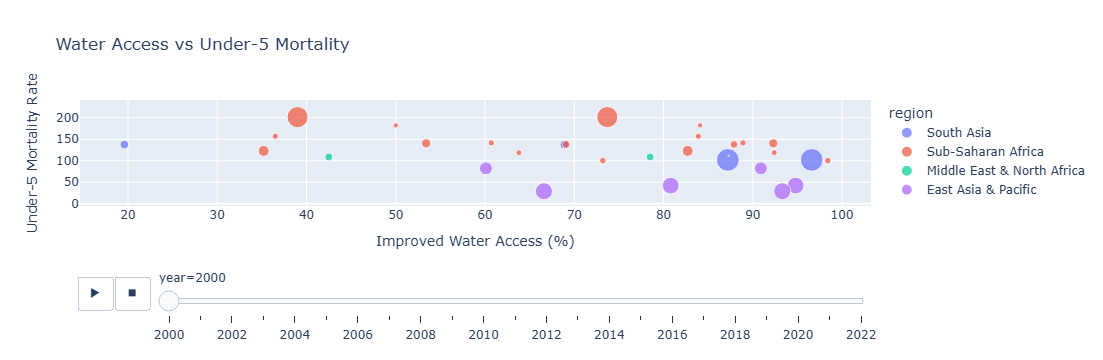

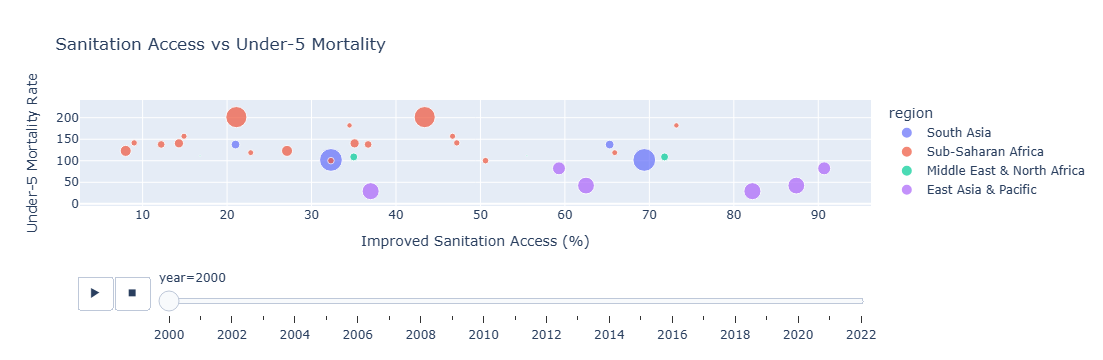

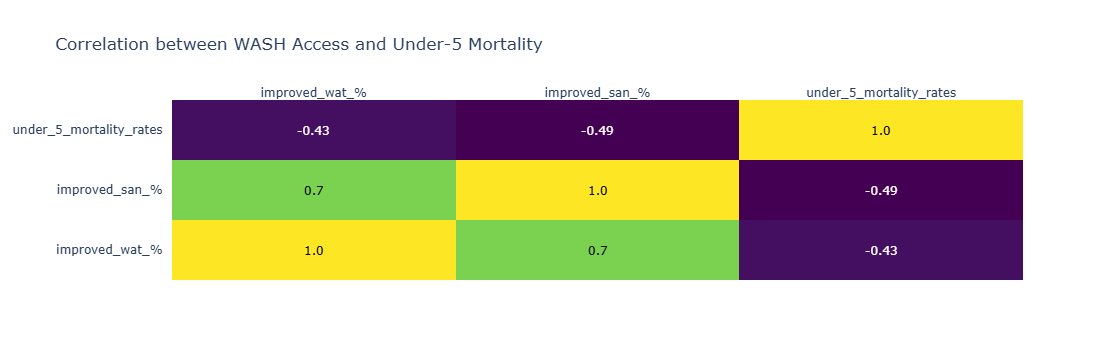

In [343]:
from scipy.stats import shapiro, pearsonr, spearmanr

# Select columns of interest
subset = df[['improved_wat_%', 'improved_san_%', 'under_5_mortality_rates']].dropna()

# -----------------------
# Normality Check
# -----------------------
print(" Normality Check (Shapiro-Wilk Test):")
for col in subset.columns:
    stat, p = shapiro(subset[col])
    print(f"{col} - W-statistic = {stat:.4f}, p-value = {p:.4f}")
    if p > 0.05:
        print(" Data is likely normal\n")
    else:
        print(" Data is not normally distributed\n")

# -----------------------
# Correlation Test
# -----------------------
print("Correlation Test:")
# If all variables are normal, use Pearson, else use Spearman
normal = all(shapiro(subset[col])[1] > 0.05 for col in subset.columns)

if normal:
    corr_func = pearsonr
    print("Using Pearson correlation (normal data)\n")
else:
    corr_func = spearmanr
    print(" Using Spearman correlation (non-normal data)\n")

# Water vs Mortality
r1, p1 = corr_func(subset['improved_wat_%'], subset['under_5_mortality_rates'])
# Sanitation vs Mortality
r2, p2 = corr_func(subset['improved_san_%'], subset['under_5_mortality_rates'])

print(f"Improved Water vs Under-5 Mortality: r = {r1:.3f}, p = {p1:.4f}")
print(f"Improved Sanitation vs Under-5 Mortality: r = {r2:.3f}, p = {p2:.4f}")

# -----------------------
# Plot 1: Water vs Mortality
# -----------------------
fig3 = px.scatter(df, x='improved_wat_%', y='under_5_mortality_rates',
                  color='region', size='total_population', hover_name='county',
                  animation_frame='year',
                  title='Water Access vs Under-5 Mortality',
                  labels={'improved_wat_%': 'Improved Water Access (%)',
                          'under_5_mortality_rates': 'Under-5 Mortality Rate'})
fig3.show()
fig3.write_image("improved_water_access.png")

# -----------------------
# Plot 2: Sanitation vs Mortality
# -----------------------
fig4 = px.scatter(df, x='improved_san_%', y='under_5_mortality_rates',
                  color='region', size='total_population', hover_name='county',
                  animation_frame='year',
                  title='Sanitation Access vs Under-5 Mortality',
                  labels={'improved_san_%': 'Improved Sanitation Access (%)',
                          'under_5_mortality_rates': 'Under-5 Mortality Rate'})
fig4.show()
fig4.write_image("sanitation_access.png")

# -----------------------
# Correlation Matrix Heatmap
# -----------------------
correlation = subset.corr()
z = correlation.values.round(2)
x = list(correlation.columns)
y = x

fig5 = ff.create_annotated_heatmap(z, x=x, y=y, colorscale='Viridis')
fig5.update_layout(title='Correlation between WASH Access and Under-5 Mortality',
                   template='plotly_white')
fig5.show()
fig5.write_image("correlation_between_wash_access.png")


### 3. Statistical test of SDG_6


 Checking normality for: improved_wat_%


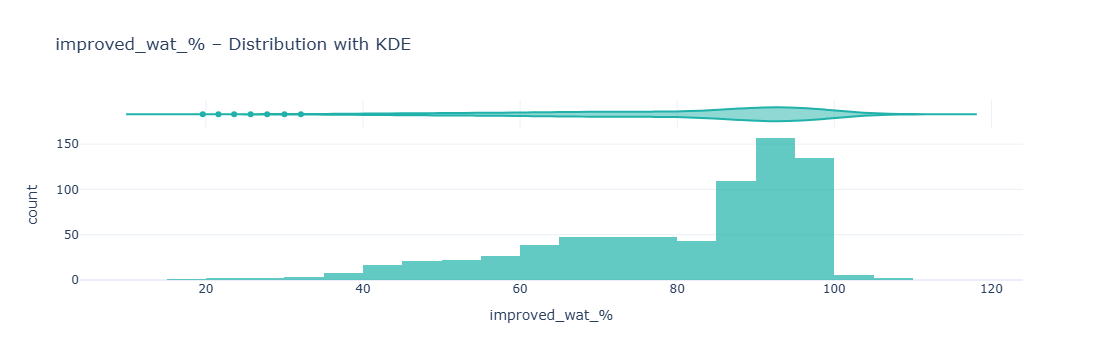

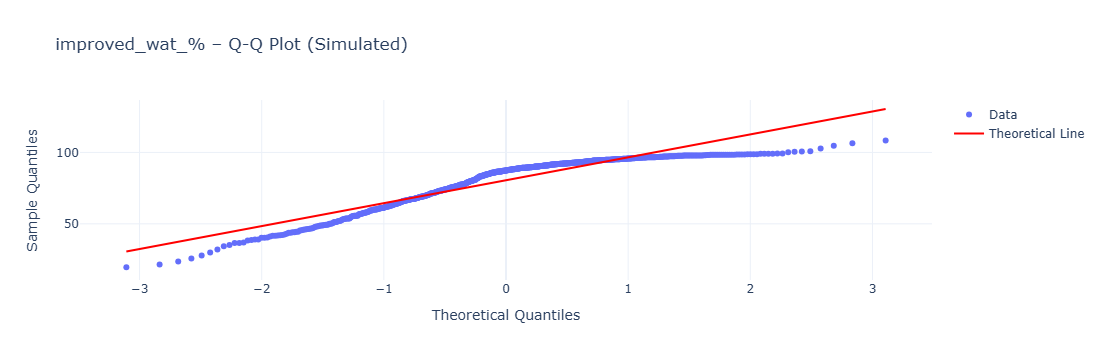

 Shapiro-Wilk p-value: 0.0000
 D’Agostino’s K² p-value: 0.0000
 improved_wat_% is **NOT normally distributed**.


 Checking normality for: improved_san_%


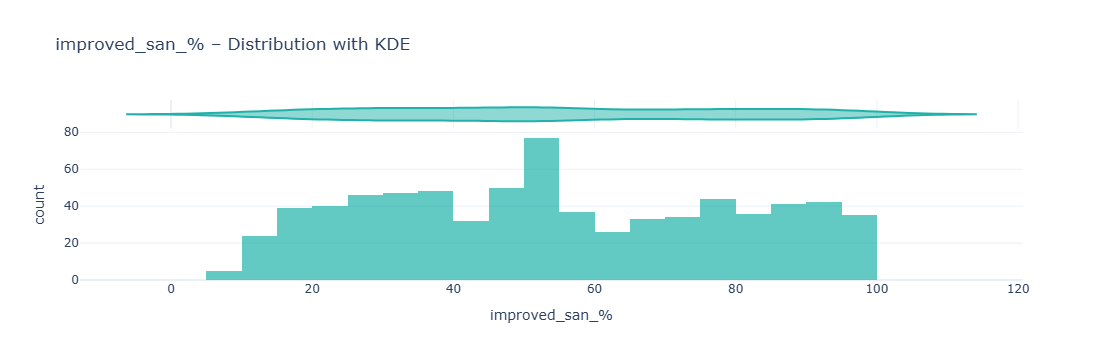

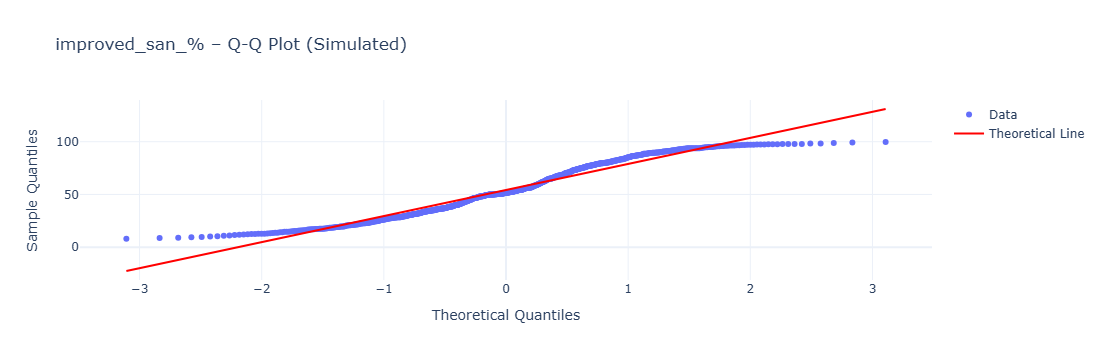

 Shapiro-Wilk p-value: 0.0000
 D’Agostino’s K² p-value: 0.0000
 improved_san_% is **NOT normally distributed**.


 Checking normality for: under_5_mortality_rates


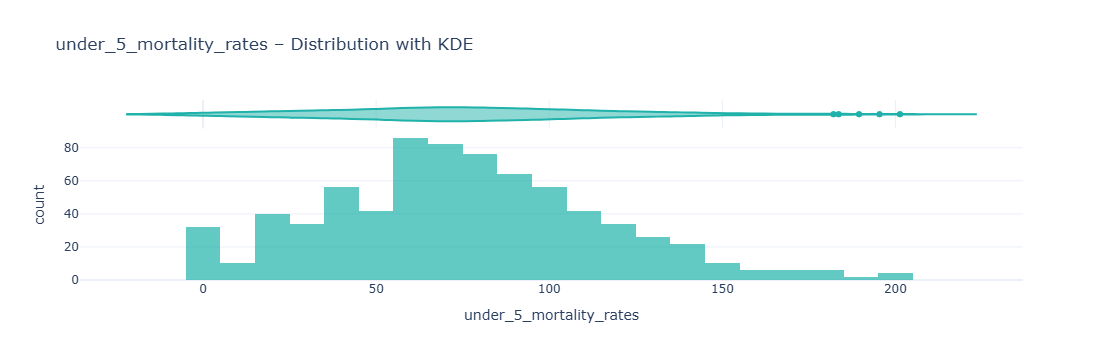

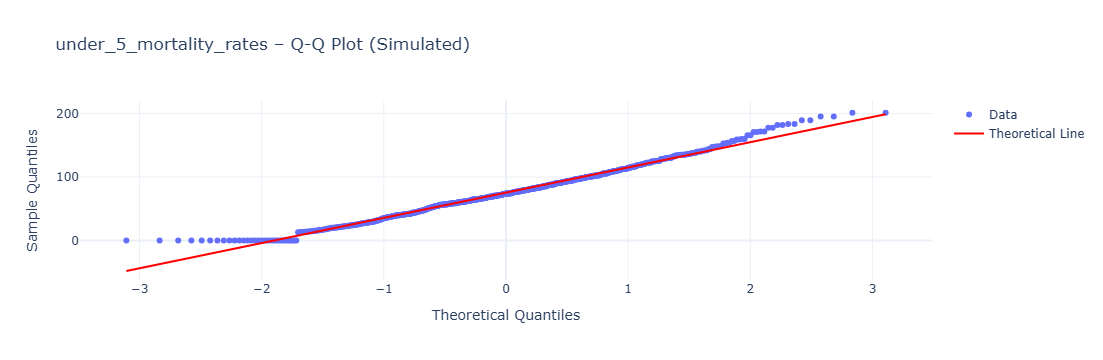

 Shapiro-Wilk p-value: 0.0000
 D’Agostino’s K² p-value: 0.0007
 under_5_mortality_rates is **NOT normally distributed**.



In [380]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
from scipy.stats import shapiro, normaltest, probplot
import numpy as np

cols_to_check = ['improved_wat_%', 'improved_san_%', 'under_5_mortality_rates']
df_normal = df[cols_to_check].dropna()

for col in cols_to_check:
    print(f"\n Checking normality for: {col}")


    hist_fig = px.histogram(df_normal, x=col, nbins=30, marginal='violin', opacity=0.7,
                            title=f"{col} – Distribution with KDE",
                            color_discrete_sequence=['lightseagreen'])
    hist_fig.update_layout(template='plotly_white')
    hist_fig.show()

    # Simulated Q-Q Plot using scipy's probplot
    (osm, osr), (slope, intercept, r) = probplot(df_normal[col], dist="norm")

    qq_fig = go.Figure()
    qq_fig.add_trace(go.Scatter(x=osm, y=osr, mode='markers', name='Data'))
    qq_fig.add_trace(go.Scatter(x=osm, y=slope * np.array(osm) + intercept,
                                mode='lines', name='Theoretical Line', line=dict(color='red')))
    qq_fig.update_layout(title=f"{col} – Q-Q Plot (Simulated)",
                         xaxis_title='Theoretical Quantiles',
                         yaxis_title='Sample Quantiles',
                         template='plotly_white')
    qq_fig.show()

    # Shapiro-Wilk Test
    if len(df_normal[col]) <= 5000:
        stat, p_shapiro = shapiro(df_normal[col])
        print(f" Shapiro-Wilk p-value: {p_shapiro:.4f}")
    else:
        p_shapiro = None
        print(" Shapiro-Wilk skipped (sample size > 5000)")

    # D’Agostino’s K-squared Test
    stat, p_dagostino = normaltest(df_normal[col])
    print(f" D’Agostino’s K² p-value: {p_dagostino:.4f}")

    # Final interpretation
    if p_dagostino < 0.05 or (p_shapiro is not None and p_shapiro < 0.05):
        print(f" {col} is **NOT normally distributed**.\n")
    else:
        print(f" {col} appears to be **normally distributed**.\n")


### 4. Statistical test between improved water and sanitation by countries

In [361]:
from scipy.stats import shapiro
import statsmodels.api as sm

# Shapiro-Wilk Test (valid for n < 30)
shapiro_water = shapiro(latest_selected['improved_wat_%'])
shapiro_sanitation = shapiro(latest_selected['improved_san_%'])

print("Shapiro-Wilk Test for Improved Water Access:")
print(f"Statistic: {shapiro_water.statistic:.3f}, p-value: {shapiro_water.pvalue:.3f}")
print(" Data is Normal" if shapiro_water.pvalue > 0.05 else " Data is Not Normal")

print("\nShapiro-Wilk Test for Improved Sanitation Access:")
print(f"Statistic: {shapiro_sanitation.statistic:.3f}, p-value: {shapiro_sanitation.pvalue:.3f}")
print("Data is Normal" if shapiro_sanitation.pvalue > 0.05 else " Data is Not Normal")


Shapiro-Wilk Test for Improved Water Access:
Statistic: 0.993, p-value: 0.974
 Data is Normal

Shapiro-Wilk Test for Improved Sanitation Access:
Statistic: 0.845, p-value: 0.212
Data is Normal


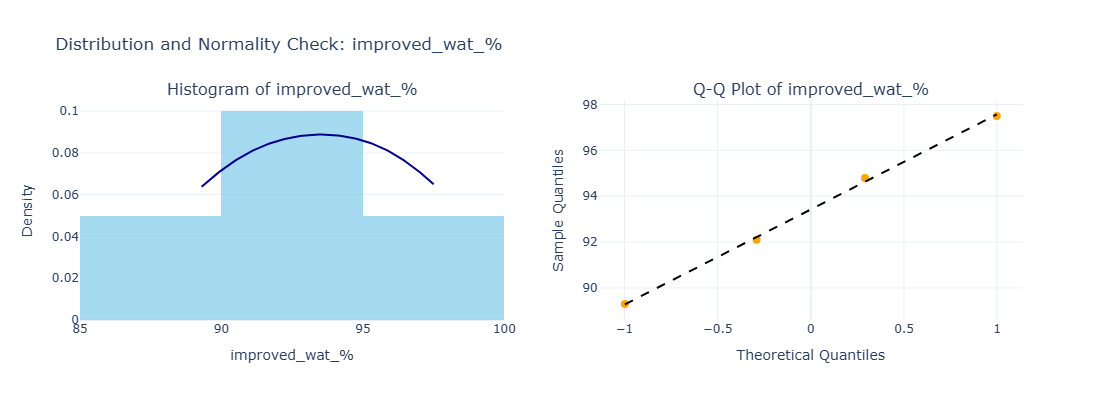

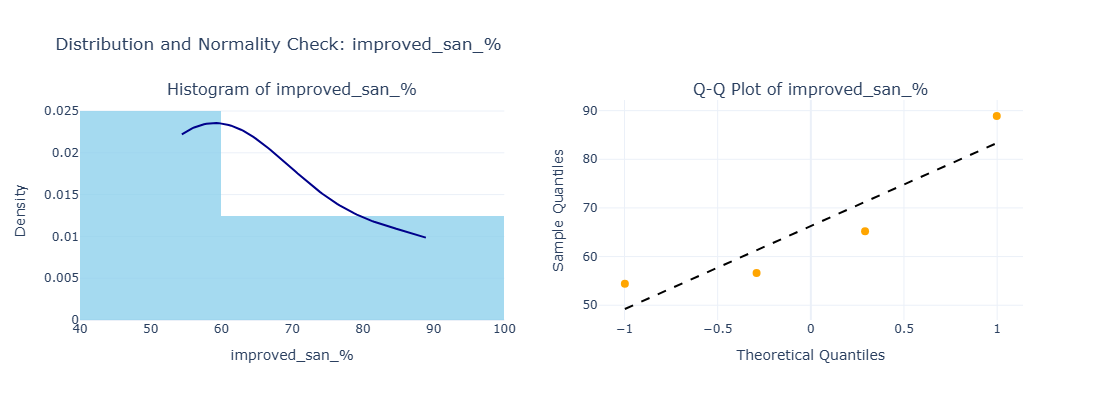

In [365]:
variables = ['improved_wat_%', 'improved_san_%']

for var in variables:
    # Prepare data for Q-Q plot
    qq_data = stats.probplot(latest_selected[var], dist="norm", plot=None)
    theoretical_quantiles = qq_data[0][0]
    sample_quantiles = qq_data[0][1]
    slope, intercept = qq_data[1][0], qq_data[1][1]
    line_fit = slope * theoretical_quantiles + intercept

    # Create subplot layout with 1 row and 2 columns
    fig = sp.make_subplots(rows=1, cols=2, subplot_titles=[f'Histogram of {var}', f'Q-Q Plot of {var}'])

    # Histogram with KDE using Plotly
    fig.add_trace(
        go.Histogram(
            x=latest_selected[var],
            histnorm='probability density',
            name='Histogram',
            marker_color='skyblue',
            opacity=0.75
        ),
        row=1, col=1
    )

    # Add KDE Curve using normal distribution fit
    kde_x = np.linspace(latest_selected[var].min(), latest_selected[var].max(), 100)
    kde_y = stats.gaussian_kde(latest_selected[var])(kde_x)
    fig.add_trace(
        go.Scatter(
            x=kde_x,
            y=kde_y,
            mode='lines',
            name='KDE',
            line=dict(color='darkblue')
        ),
        row=1, col=1
    )

    # Q-Q Plot
    fig.add_trace(
        go.Scatter(
            x=theoretical_quantiles,
            y=sample_quantiles,
            mode='markers',
            name='Q-Q Points',
            marker=dict(color='orange', size=8)
        ),
        row=1, col=2
    )
    # Add Q-Q line
    fig.add_trace(
        go.Scatter(
            x=theoretical_quantiles,
            y=line_fit,
            mode='lines',
            name='Q-Q Line',
            line=dict(color='black', dash='dash')
        ),
        row=1, col=2
    )

    # Layout
    fig.update_layout(
        title_text=f'Distribution and Normality Check: {var}',
        showlegend=False,
        template='plotly_white',
        height=400,
        width=1000
    )
    fig.update_xaxes(title_text=var, row=1, col=1)
    fig.update_xaxes(title_text='Theoretical Quantiles', row=1, col=2)
    fig.update_yaxes(title_text='Density', row=1, col=1)
    fig.update_yaxes(title_text='Sample Quantiles', row=1, col=2)

    fig.show()
